In [4]:
"""
Chapter_1.17.2. Visualization of MLP weights on MNIST
参考
http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py
"""
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")

In [5]:
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print(mnist.keys())
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

dict_keys(['DESCR', 'target', 'data', 'COL_NAMES'])
(70000, 784)
(70000,)
(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [7]:
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.32212731
Iteration 2, loss = 0.15738787
Iteration 3, loss = 0.11647274
Iteration 4, loss = 0.09631113
Iteration 5, loss = 0.08074513
Iteration 6, loss = 0.07163224
Iteration 7, loss = 0.06351392
Iteration 8, loss = 0.05694146
Iteration 9, loss = 0.05213487
Iteration 10, loss = 0.04708320
Iteration 11, loss = 0.04188246
Iteration 12, loss = 0.03864420
Iteration 13, loss = 0.03513415
Iteration 14, loss = 0.03222310
Iteration 15, loss = 0.02956183
Iteration 16, loss = 0.02620840
Iteration 17, loss = 0.02424569
Iteration 18, loss = 0.02129204
Iteration 19, loss = 0.02030622
Iteration 20, loss = 0.01848272
Iteration 21, loss = 0.01671861
Iteration 22, loss = 0.01520329
Iteration 23, loss = 0.01411466
Iteration 24, loss = 0.01292346
Iteration 25, loss = 0.01138195
Iteration 26, loss = 0.00996422
Iteration 27, loss = 0.00846271
Iteration 28, loss = 0.00736762
Iteration 29, loss = 0.00692193
Iteration 30, loss = 0.00544863
Iteration 31, loss = 0.00542354
Iteration 32, los

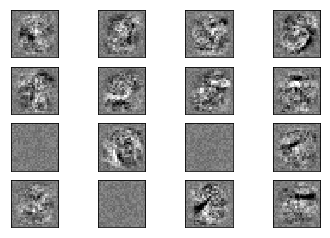

In [8]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()